In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

In [37]:
df = pd.read_excel(r'C:\Users\User\Desktop\50 DAYS\Days18_\data\Duolingo_Language_Ranking_Cleaned.xlsx')
print(df.head())
print(df.info())


       Country  Year  Popularity_Ranking Language
0  Afghanistan  2020                   1  English
1  Afghanistan  2021                   1  English
2  Afghanistan  2022                   1   German
3  Afghanistan  2023                   1  English
4  Afghanistan  2024                   1  English
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             1930 non-null   object
 1   Year                1930 non-null   int64 
 2   Popularity_Ranking  1930 non-null   int64 
 3   Language            1930 non-null   object
dtypes: int64(2), object(2)
memory usage: 60.4+ KB
None


In [61]:

africa = [
    'Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina-Faso', 'Burundi', 'Cabo-Verde', 'Cameroon', 'Central African Republic',
    'Chad', 'Comoros', 'Congo', 'Cote-dIvoire', 'Democratic-Rep-Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea',
    'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea Bissau', 'Kenya', 'Lesotho',
    'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique',
    'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone',
    'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'
]

asia = [
    'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China',
    'East Timor', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan',
    'Kuwait', 'Kyrgyzstan', 'Lao', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea',
    'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Saudi-Arabia', 'Singapore', 'South Korea',
    'Sri Lanka', 'Syria', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates',
    'Uzbekistan', 'Vietnam', 'Yemen'
]

europe = [
    'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia-Herzegovina', 'Bulgaria', 'Croatia',
    'Cyprus', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lichtenstein', 'Lithuania', 'Luxembourg', 'Macedonia',
    'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
    'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine',
    'United Kingdom', 'Vatican City'
]

north_america = [
    'Antigua-Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa-Rica', 'Cuba', 'Dominica',
    'Dominican-Rep', 'El-Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico',
    'Nicaragua', 'Panama', 'St Kitts and Nevis', 'St Lucia', 'St Vincent and the Grenadines', 'Trinidad and Tobago',
    'USA'
]

south_america = [
    'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru',
    'Suriname', 'Uruguay', 'Venezuela'
]

oceania = [
    'Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau',
    'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'
]

country_to_continent_full = {}

for country in africa:
    country_to_continent_full[country] = 'Africa'
for country in asia:
    country_to_continent_full[country] = 'Asia'
for country in europe:
    country_to_continent_full[country] = 'Europe'
for country in north_america:
    country_to_continent_full[country] = 'North America'
for country in south_america:
    country_to_continent_full[country] = 'South America'
for country in oceania:
    country_to_continent_full[country] = 'Oceania'

df['Continent'] = df['Country'].map(country_to_continent_full).fillna('Unknown')



In [33]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())



Missing values:
 Country               0
Year                  0
Popularity_Ranking    0
Language              0
Continent             0
dtype: int64


In [39]:
# Identify the most popular language worldwide in 2024 based on the lowest average popularity ranking.
top_lang_2024 = df[df["Year"] == 2024].groupby("Language")["Popularity_Ranking"].mean().sort_values().head(1)
print(top_lang_2024)

Language
English    1.124183
Name: Popularity_Ranking, dtype: float64


In [45]:
# Display how language popularity rankings have changed in Afghanistan across different years.
afg_trend = df[df["Country"] == "Afghanistan"][["Year", "Language", "Popularity_Ranking"]]
print(afg_trend)

   Year Language  Popularity_Ranking
0  2020  English                   1
1  2021  English                   1
2  2022   German                   1
3  2023  English                   1
4  2024  English                   1
5  2020  Spanish                   2
6  2021  Turkish                   2
7  2022  English                   2
8  2023   German                   2
9  2024   German                   2


In [47]:
# Compute the average popularity ranking of all languages for each year.
avg_rank_by_year = df.groupby("Year")["Popularity_Ranking"].mean()
print(avg_rank_by_year)

Year
2020    1.5
2021    1.5
2022    1.5
2023    1.5
2024    1.5
Name: Popularity_Ranking, dtype: float64


In [49]:
# List the 10 countries where English had the highest popularity (lowest ranking) in 2023.
top_eng_2023 = df[(df["Year"] == 2023) & (df["Language"] == "English")].nsmallest(10, "Popularity_Ranking")[["Country", "Popularity_Ranking"]]
print(top_eng_2023)

         Country  Popularity_Ranking
3    Afghanistan                   1
23       Algeria                   1
33       Andorra                   1
43        Angola                   1
63     Argentina                   1
73       Armenia                   1
93       Austria                   1
103   Azerbaijan                   1
123      Bahrain                   1
133   Bangladesh                   1


In [53]:
# Count how many different languages were tracked in each country.
lang_count_by_country = df.groupby("Country")["Language"].nunique()
print(lang_count_by_country.head(20))

Country
Afghanistan        4
Albania            2
Algeria            2
Andorra            3
Angola             2
Antigua-Barbuda    2
Argentina          3
Armenia            2
Australia          2
Austria            3
Azerbaijan         3
Bahamas            2
Bahrain            2
Bangladesh         4
Barbados           2
Belarus            2
Belgium            3
Belize             2
Benin              3
Bhutan             2
Name: Language, dtype: int64


In [63]:
# Show the distribution of languages across continents using value counts.
lang_by_continent = df.groupby("Continent")["Language"].value_counts()
print(lang_by_continent)

Continent      Language  
Africa         French        204
               English       184
               Spanish       117
               German         11
               Swahili         7
               Arabic          3
               Portuguese      2
               Turkish         2
Asia           English       199
               French         59
               Japanese       47
               Korean         39
               German         27
               Russian        21
               Spanish        21
               Chinese        17
               Hindi           5
               Portuguese      5
               Turkish         5
               Hebrew          3
               Arabic          2
Europe         English       167
               Spanish       118
               German         80
               French         34
               Italian        15
               Swedish         6
               Danish          5
               Irish           5
               No

In [69]:
# Compare the average popularity of each language across continents for the year 2024.
cont_lang_2024 = df[df["Year"] == 2024].groupby(["Continent", "Language"])["Popularity_Ranking"].mean().unstack()
print(cont_lang_2024)

Language       Arabic  Chinese   English  Finnish    French    German  Hebrew  \
Continent                                                                       
Africa            2.0      NaN  1.116279      NaN  1.697674  1.666667     NaN   
Asia              2.0      2.0  1.023256      NaN  2.000000  2.000000     2.0   
Europe            NaN      NaN  1.131579      2.0  2.000000  1.764706     NaN   
North America     NaN      NaN  1.166667      NaN  1.947368       NaN     NaN   
Oceania           NaN      2.0  1.800000      NaN  1.857143       NaN     NaN   
South America     NaN      NaN  1.166667      NaN  2.000000       NaN     NaN   
Unknown           NaN      NaN       NaN      NaN  1.500000       NaN     NaN   

Language       Hindi  Irish   Italian  Japanese  Korean  Norwegian  \
Continent                                                            
Africa           NaN    NaN       NaN       NaN     NaN        NaN   
Asia             2.0    NaN       NaN  1.750000     2.0     

In [73]:
# Calculate the mean popularity ranking of all languages per continent.
avg_rank_by_cont = df.groupby("Continent")["Popularity_Ranking"].mean()
print(avg_rank_by_cont)

Continent
Africa           1.5
Asia             1.5
Europe           1.5
North America    1.5
Oceania          1.5
South America    1.5
Unknown          1.5
Name: Popularity_Ranking, dtype: float64


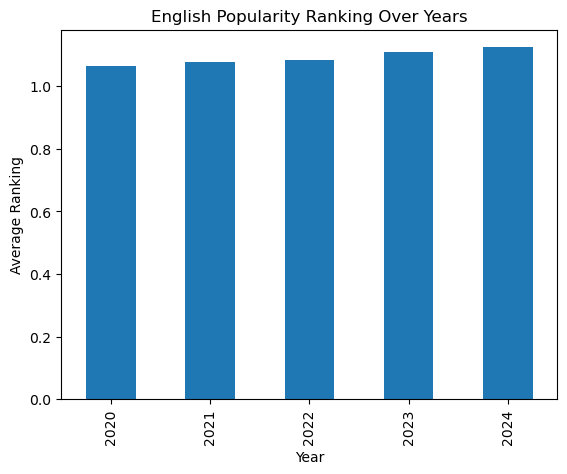

In [77]:
# Visualize how the popularity ranking of English has changed year over year.
df[df["Language"] == "English"].groupby("Year")["Popularity_Ranking"].mean().plot(kind="bar")
plt.title("English Popularity Ranking Over Years")
plt.ylabel("Average Ranking")
plt.show()

In [81]:
# Count how many countries had English among their listed languages each year.
eng_count_by_year = df[df["Language"] == "English"].groupby("Year")["Country"].nunique()
print(eng_count_by_year)

Year
2020    127
2021    129
2022    130
2023    136
2024    153
Name: Country, dtype: int64


In [85]:
# Sum of popularity rankings for all languages within each continent.
total_rank_by_cont = df.groupby("Continent")["Popularity_Ranking"].sum()
print(total_rank_by_cont)

Continent
Africa           795
Asia             675
Europe           660
North America    345
Oceania          210
South America    180
Unknown           30
Name: Popularity_Ranking, dtype: int64


In [89]:
# Determine the top 10 most popular languages in 2021 based on average ranking.
top_lang_2021 = df[df["Year"] == 2021].groupby("Language")["Popularity_Ranking"].mean().sort_values().head(10)
print(top_lang_2021)

Language
Swahili     1.000000
Irish       1.000000
Swedish     1.000000
English     1.077519
Italian     1.600000
Japanese    1.642857
Spanish     1.655556
German      1.666667
French      1.733333
Korean      1.800000
Name: Popularity_Ranking, dtype: float64


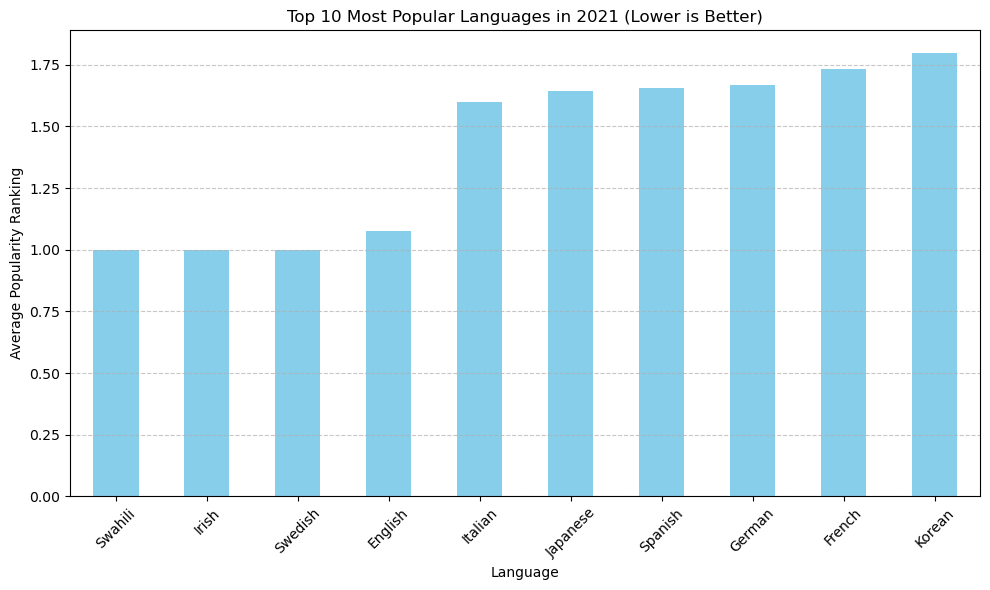

In [163]:
plt.figure(figsize=(10, 6))
top_lang_2021.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Languages in 2021 (Lower is Better)")
plt.xlabel("Language")
plt.ylabel("Average Popularity Ranking")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [91]:
# Show how the popularity ranking of German evolved over the years.
ger_trend = df[df["Language"] == "German"].groupby("Year")["Popularity_Ranking"].mean()
print(ger_trend)

Year
2020    1.636364
2021    1.666667
2022    1.666667
2023    1.692308
2024    1.800000
Name: Popularity_Ranking, dtype: float64


In [97]:
# Display the countries with the highest number of distinct languages tracked.
lang_diversity = df.groupby("Country")["Language"].nunique().sort_values(ascending=False).head(20)
print(lang_diversity)

Country
Kiribati           6
Pakistan           5
Afghanistan        4
Thailand           4
Nepal              4
Philippines        4
San Marino         4
Solomon Islands    4
Kazakhstan         4
Sri Lanka          4
Bangladesh         4
Myanmar            4
Venezuela          4
Uganda             4
Iceland            4
Italy              4
Japan              3
Macedonia          3
Mauritius          3
Guinea Bissau      3
Name: Language, dtype: int64


In [101]:
# Show how different languages are distributed by continent for the year 2023.
lang_by_cont_2023 = df[df["Year"] == 2023].groupby("Continent")["Language"].value_counts()
print(lang_by_cont_2023)

Continent      Language  
Africa         French        43
               English       38
               Spanish       19
               German         3
               Swahili        2
               Arabic         1
Asia           English       40
               French        12
               Japanese      10
               Korean         8
               German         5
               Russian        5
               Chinese        4
               Spanish        2
               Arabic         1
               Hebrew         1
               Hindi          1
               Portuguese     1
Europe         English       34
               Spanish       21
               German        18
               French         7
               Italian        4
               Finnish        1
               Irish          1
               Norwegian      1
               Swedish        1
North America  French        19
               Spanish       15
               English       12
Oceania       

In [105]:
# Compare average English popularity rankings across continents for 2020.
eng_by_cont_2020 = df[(df["Year"] == 2020) & (df["Language"] == "English")].groupby("Continent")["Popularity_Ranking"].mean()
print(eng_by_cont_2020)

Continent
Africa           1.058824
Asia             1.052632
Europe           1.032258
North America    1.166667
Oceania          2.000000
South America    1.000000
Name: Popularity_Ranking, dtype: float64


In [107]:
# Count how many years each language held the number one popularity ranking.
top_lang_years = df[df["Popularity_Ranking"] == 1].groupby("Language")["Year"].nunique()
print(top_lang_years)

Language
Chinese     1
English     5
French      5
German      5
Irish       2
Italian     4
Japanese    5
Korean      4
Spanish     5
Swahili     2
Swedish     3
Name: Year, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
top_lang_2021.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Popular Languages in 2021 (Lower is Better)")
plt.xlabel("Language")
plt.ylabel("Average Popularity Ranking")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [145]:
# Display the 10 Asian countries with the most popular language rankings.
top_asia = df[df["Continent"] == "Asia"].nsmallest(10, "Popularity_Ranking")[["Country", "Popularity_Ranking"]]
print(top_asia)

        Country  Popularity_Ranking
0   Afghanistan                   1
1   Afghanistan                   1
2   Afghanistan                   1
3   Afghanistan                   1
4   Afghanistan                   1
70      Armenia                   1
71      Armenia                   1
72      Armenia                   1
73      Armenia                   1
74      Armenia                   1


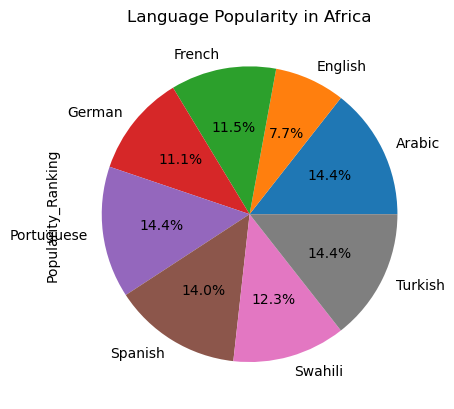

In [147]:
# Show proportional language popularity rankings in Africa using a pie chart.
df[df["Continent"] == "Africa"].groupby("Language")["Popularity_Ranking"].mean().plot(kind="pie", autopct='%1.1f%%')
plt.title("Language Popularity in Africa")
plt.show()

In [149]:
ger_by_cont = df[df["Language"] == "German"].groupby("Continent")["Popularity_Ranking"].mean()
print(ger_by_cont)

Continent
Africa    1.545455
Asia      1.925926
Europe    1.637500
Name: Popularity_Ranking, dtype: float64


In [151]:
# Track the most popular language in North America for each year.
top_lang_na = (
    df[df["Continent"] == "North America"]
    .loc[df["Continent"] == "North America"]
    .sort_values("Popularity_Ranking")
    .groupby("Year")
    .first()
    .reset_index()[["Year", "Language", "Popularity_Ranking"]]
)

print(top_lang_na)


   Year Language  Popularity_Ranking
0  2020  Spanish                   1
1  2021  English                   1
2  2022  English                   1
3  2023  English                   1
4  2024  English                   1


In [153]:
# Identify the most popular language in Europe for each year.
top_lang_europe = (
    df[df["Continent"] == "Europe"]
    .sort_values("Popularity_Ranking")
    .groupby("Year")
    .first()
    .reset_index()[["Year", "Language", "Popularity_Ranking"]]
)

print(top_lang_europe)


   Year Language  Popularity_Ranking
0  2020   German                   1
1  2021  Spanish                   1
2  2022  Spanish                   1
3  2023  Spanish                   1
4  2024  Spanish                   1


In [173]:
# Calculate the proportion of each language within a continent
lang_ratio = df[df["Continent"] == "Europe"]["Language"].value_counts(normalize=True) * 100
print(lang_ratio)

Language
English      37.954545
Spanish      26.818182
German       18.181818
French        7.727273
Italian       3.409091
Swedish       1.363636
Danish        1.136364
Irish         1.136364
Norwegian     1.136364
Finnish       0.909091
Russian       0.227273
Name: proportion, dtype: float64


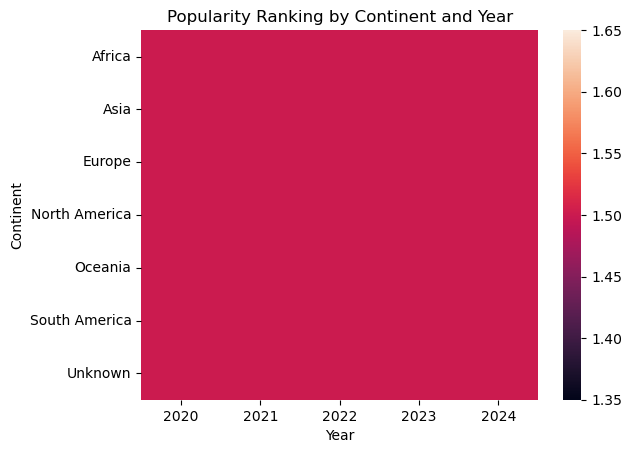

In [143]:
# Generate a heatmap to visualize the average language ranking per continent and year.
pivot = df.pivot_table(values="Popularity_Ranking", index="Continent", columns="Year", aggfunc="mean")
sns.heatmap(pivot)
plt.title("Popularity Ranking by Continent and Year")
plt.show()

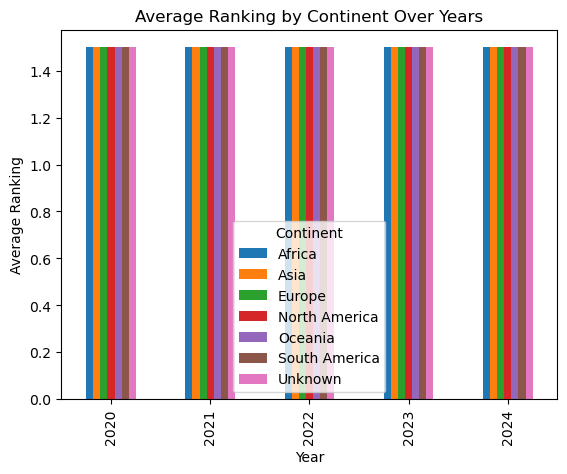

In [167]:
df.groupby(["Year", "Continent"])["Popularity_Ranking"].mean().unstack().plot(kind="bar")
plt.title("Average Ranking by Continent Over Years")
plt.ylabel("Average Ranking")
plt.show()

In [189]:
# Predicting the popularity ranking of English for the year 2025 using linear regression

# Filter data for English language
data = df[df["Language"] == "English"][["Year", "Popularity_Ranking"]]

# Define features (Year) and target (Popularity Ranking)
X = data["Year"].values.reshape(-1, 1)
y = data["Popularity_Ranking"].values

# Fit linear regression model
model = LinearRegression().fit(X, y)

# Predict the ranking for 2025
pred_2025 = model.predict([[2025]])
print("Predicted English Ranking for 2025:", round(pred_2025[0], 2))


Predicted English Ranking for 2025: 1.14
